In [1]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

%matplotlib notebook

# 1 Intuition on SVD

In [2]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1a

In [4]:
# YOUR PART


## 1b

In [5]:
# YOUR PART
def compute_svd(X):
    U, s, Vt = np.linalg.svd(X)
    S = np.diag(s)
    return U, S, Vt

i=1
for matrix in [M1,M2,M3,M4,M5,M6]:
    U, S, Vt = compute_svd(matrix)
    print('For Matrix {}'.format(i))
    print('Matrix U is {}'.format(U))
    print('Matrix S is {}'.format(S))
    print('Matrix Vt is {}'.format(Vt))
    i=i+1


For Matrix 1
Matrix U is [[-0.57735027 -0.57735027  0.          0.         -0.57735027]
 [-0.57735027 -0.21132487  0.          0.          0.78867513]
 [-0.57735027  0.78867513  0.          0.         -0.21132487]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]]
Matrix S is [[3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Matrix Vt is [[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]]
For Matrix 2
Matrix U is [[ 0.          0.          0.          0.          1.        ]
 [-0.57735027 -0.57735027 -0.57735027  0.          0.        ]
 [-0.57735027  0.78867513 -0.21132487  0.          0.        ]
 [-0.57735027

## 1c

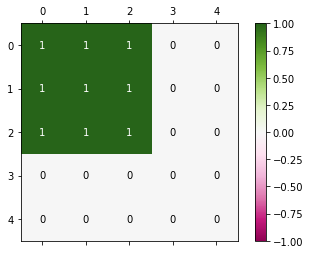

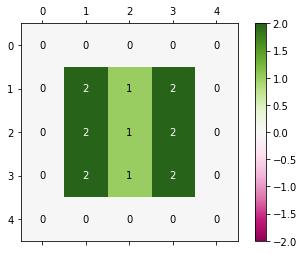

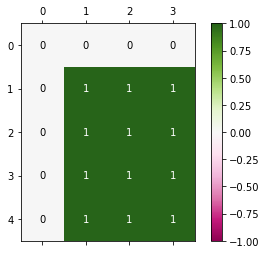

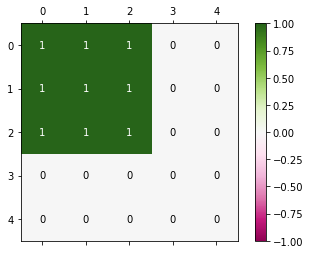

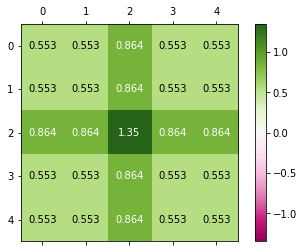

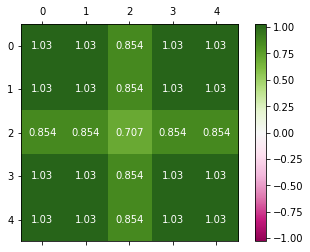

In [6]:
# You can use the functions svdcomp and plot_matrix from util.py
# YOUR PART
i=0
for matrix in [M1,M2,M3,M4,M5,M6]:
    A_1 = svdcomp(matrix, range(1))
    plot_matrix(A_1)
    plt.savefig('1c{}'.format(i))
    i=i+1

## 1d

1
2


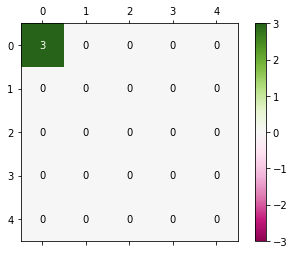

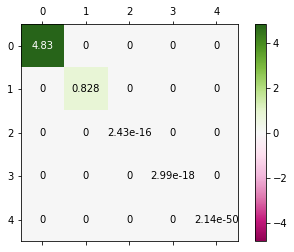

In [7]:
# Another method to compute the rank is matrix_rank.
# YOUR PART
for matrix in [M1,M6]:
    U, S, Vt = compute_svd(matrix)
    r = matrix_rank(matrix)
    print(r)
    plot_matrix(S)

# 2 The SVD on Weather Data

In [8]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

In [9]:
climate.head()
print(climate.describe())

              min1         min2         min3         min4         min5  \
count  2575.000000  2575.000000  2575.000000  2575.000000  2575.000000   
mean     -4.756272    -4.363223    -1.795767     1.642913     5.799922   
std       6.491773     6.483893     5.842684     5.026565     4.336553   
min     -23.200000   -23.600000   -22.500000   -19.600000   -11.400000   
25%      -8.400000    -7.900000    -5.000000    -0.700000     3.700000   
50%      -4.300000    -3.500000    -0.800000     2.600000     6.500000   
75%      -0.100000     0.300000     2.100000     4.800000     8.300000   
max      11.900000    11.300000    11.800000    13.300000    16.400000   

              min6         min7         min8         min9        min10  ...  \
count  2575.000000  2575.000000  2575.000000  2575.000000  2575.000000  ...   
mean      9.571806    11.632777    11.285592     8.427573     4.579728  ...   
std       4.006211     3.988869     4.185861     4.499939     4.710305  ...   
min      -5.50000

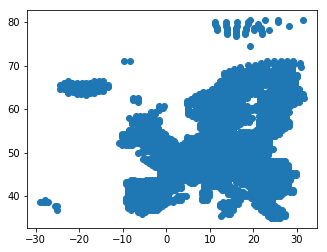

In [10]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [11]:
# YOUR PART
# Center the data (i.e., substract the column mean from each column). Store the result
# in X.
print(climate.head())
print(climate.shape)
#X = np.zeros([2575,48])
X = pd.DataFrame()
for feature in climate:
    X[feature] = (climate[feature] - np.mean(climate[feature]))/np.std(climate[feature])

print(X.head())

   min1  min2  min3  min4  min5  min6  min7  min8  min9  min10  ...   rain3  \
0  10.6   9.9  10.5  11.0  12.5  14.7  16.9  18.0  17.1   15.0  ...  103.00   
1   8.3   7.6   8.1   8.6  10.2  12.4  14.7  15.9  14.8   12.7  ...  108.29   
2  10.1   9.5   9.9  10.5  12.0  14.2  16.4  17.4  16.6   14.6  ...  119.00   
3  10.2   9.7   9.9  10.7  12.2  14.3  16.4  17.4  16.6   14.7  ...  141.20   
4  11.7  11.1  11.5  12.1  13.5  15.7  17.8  18.9  18.1   16.1  ...  119.50   

    rain4   rain5   rain6   rain7   rain8   rain9  rain10  rain11  rain12  
0  74.000  66.000  53.000  41.000  57.000  92.000   118.0  126.00   126.0  
1  72.429  63.286  50.571  38.857  53.714  88.571   118.0  125.43   120.0  
2  75.000  60.400  48.400  38.400  50.400  84.400   120.4  127.00   117.8  
3  80.400  54.200  44.000  36.600  42.600  75.600   123.6  129.40   114.4  
4  74.000  58.500  47.500  38.000  48.500  83.500   121.0  125.00   116.0  

[5 rows x 48 columns]
(2575, 48)
       min1      min2      min3    

/Users/soumya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a29c278>,
      dtype=object)

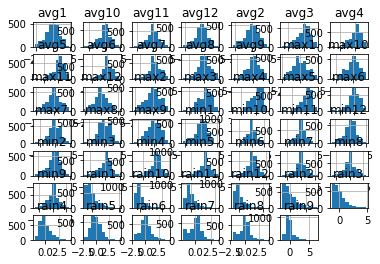

In [12]:
# Plot histograms of attributes
#nextplot()
X.hist(ax=plt.gca())

## 2b

In [15]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART
U, S, Vt = compute_svd(X)
r_x = matrix_rank(X)
print('Rank is: {}'.format(r_x))

Rank is: 48


<Figure size 432x288 with 0 Axes>

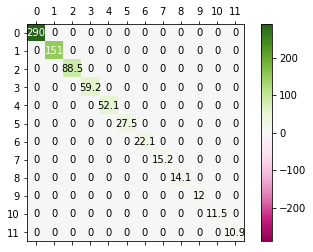

In [16]:
nextplot()
plot_matrix(S[:12,:12])
plt.savefig('2b_1')

## 2c

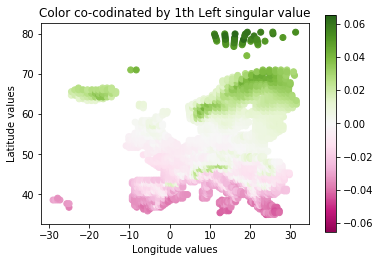

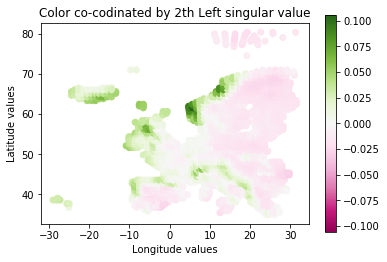

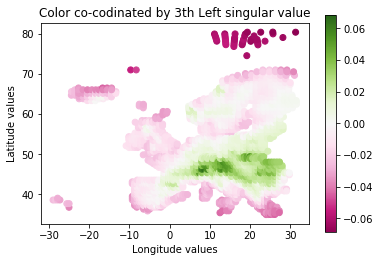

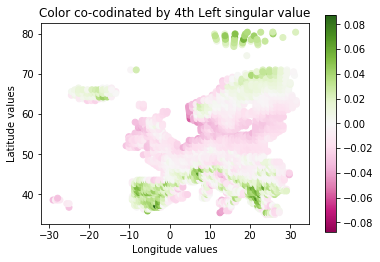

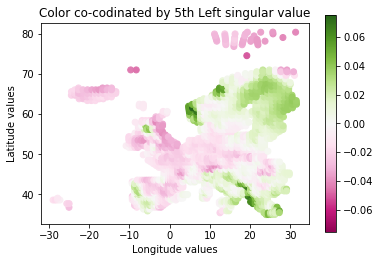

In [17]:
# Here is an example plot.
for i in [0,1,2,3,4]:
    plot_xy(lon, lat, U[:, i])
    plt.xlabel('Longitude values')
    plt.ylabel('Latitude values')
    plt.title('Color co-codinated by {}th Left singular value'.format(i+1))
    plt.savefig('2c_{}'.format(i))

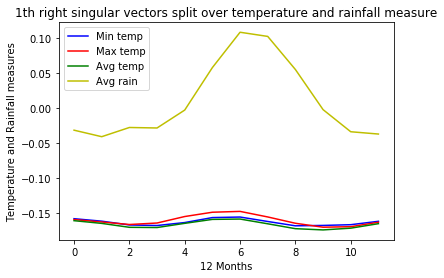

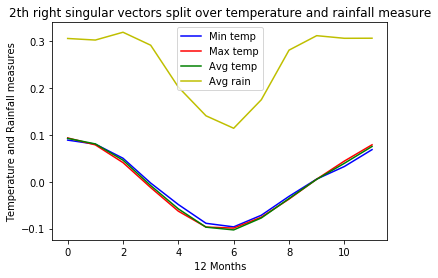

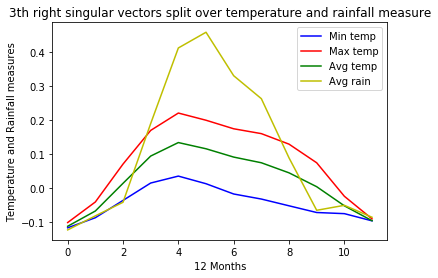

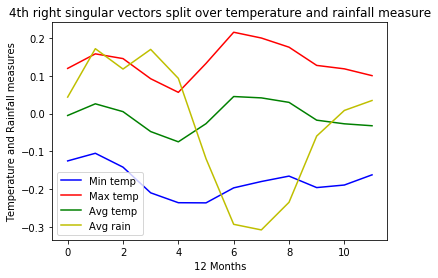

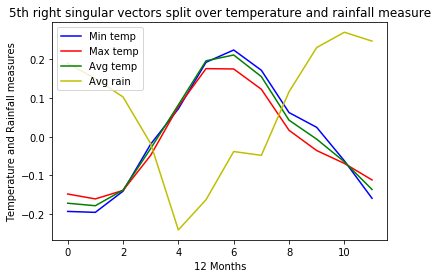

In [18]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

#nextplot()
# plot_matrix(Vt[:1,:12])

# plt.plot(Vt[0, :12])

line_type = ['b-','r-','g-','y-']
labels = ['Min temp','Max temp','Avg temp','Avg rain']
range1 = [0,12,24,36]
range2 = [12,24,36,48]

for i in range(5):
    for ran1, ran2, line, label1 in zip(range1, range2, line_type, labels):
        plt.plot(range(12), Vt[i, ran1:ran2], line, label=label1)

    plt.title('{}th right singular vectors split over temperature and rainfall measure'.format(i+1))
    plt.ylabel('Temperature and Rainfall measures')
    plt.xlabel('12 Months')
    plt.legend()
    plt.savefig('2c2_{}'.format(i))

    plt.show()
    i=i+1



## 2d

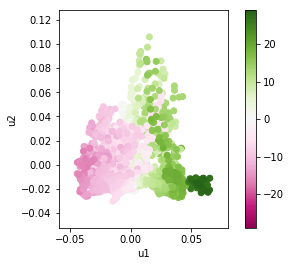

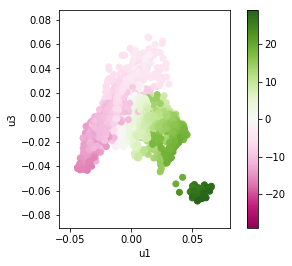

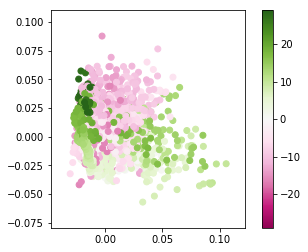

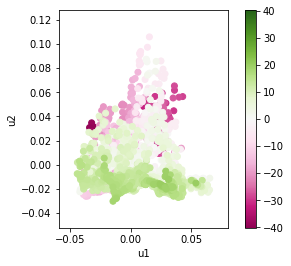

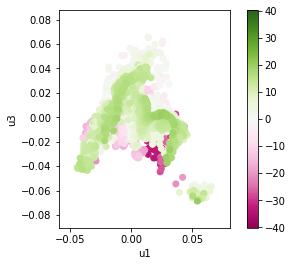

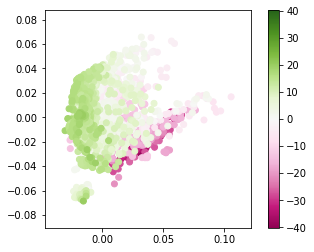

In [19]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))
plt.ylabel('u2')
plt.xlabel('u1')
plt.savefig('2d1')
plot_xy(U[:, 0], U[:, 2], lat - np.mean(lat))
plt.ylabel('u3')
plt.xlabel('u1')
plt.savefig('2d2')
plot_xy(U[:, 1], U[:, 3], lat - np.mean(lat))


plot_xy(U[:, 0], U[:, 1], lon - np.mean(lon))
plt.ylabel('u2')
plt.xlabel('u1')
plt.savefig('2d3')
plot_xy(U[:, 0], U[:, 2], lon - np.mean(lon))
plt.ylabel('u3')
plt.xlabel('u1')
plt.savefig('2d4')
plot_xy(U[:, 1], U[:, 2], lon - np.mean(lon))

## 2e

In [20]:
# 2e(i) Guttman-Kaiser
# YOUR PART
s_diag = S.diagonal()
print(s_diag)
diag_greater_one = s_diag[s_diag > 1]
print(diag_greater_one.size)

[2.90222389e+02 1.50668824e+02 8.84936404e+01 5.91859882e+01
 5.21202132e+01 2.74621244e+01 2.21341436e+01 1.52406513e+01
 1.41321813e+01 1.20289877e+01 1.14767046e+01 1.09209834e+01
 9.14704009e+00 8.39692373e+00 7.93211636e+00 7.06774614e+00
 6.74240524e+00 6.51838587e+00 5.76805648e+00 5.39678641e+00
 5.06878890e+00 4.21038123e+00 3.88507570e+00 3.37992885e+00
 3.12011424e+00 2.88184606e+00 2.53346089e+00 2.48165895e+00
 2.32967767e+00 2.07730350e+00 1.90548668e+00 1.86392296e+00
 1.72330112e+00 1.60158454e+00 1.28336386e+00 1.12607554e+00
 1.04958416e+00 9.84527428e-01 8.39920385e-01 6.56703416e-01
 4.94031887e-01 4.13336481e-01 3.78242622e-01 3.47242119e-01
 3.20887328e-01 3.06204289e-01 3.00736590e-01 2.55298845e-01]
37


In [21]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART
sq_fro = np.sum(np.square(S))
print(sq_fro)
k_90fro = 0
for i in range(len(s_diag)):
    print(np.sum(np.square(s_diag[:i+1])))
    if np.sum(np.square(s_diag[:i+1])) >= 0.9*sq_fro:
        k_90fro = i+1
        break
k_90fro

123600.00000000004
84229.03525535364
106930.12967573805
114761.25406592785


3

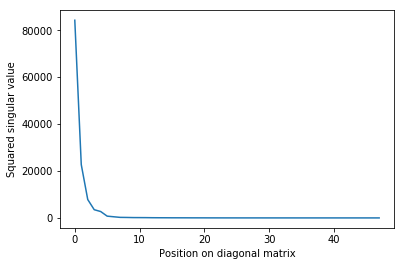

In [22]:
# 2e(iii) Scree test
s_diag_sq = np.square(s_diag)
plt.plot(s_diag_sq)
plt.xlabel('Position on diagonal matrix')
plt.ylabel('Squared singular value')
plt.savefig('2eiii')

In [23]:
# 2e(iv) entropy
# YOUR PART
m,n = X.shape
fk = np.square(s_diag)/np.sum(np.square(s_diag))
log_fk = np.log(fk)
# log_fk

E = - (1/np.log(min(m,n))) * np.sum(fk[:min(m,n)] * log_fk[:min(m,n)])
print(E)

for i in range(len(fk)):
    print(np.sum(fk[:i+1]))
    if np.sum(fk[:i+1]) >= E:
        k_entropy = i+1
        break

print(k_entropy)

0.2752163447341984
0.6814646865319872
1


In [24]:
print(fk)
fk[:2]

[6.81464687e-01 1.83665812e-01 6.33586116e-02 2.83412718e-02
 2.19782898e-02 6.10168510e-03 3.96375659e-03 1.87926740e-03
 1.61584585e-03 1.17068403e-03 1.06565331e-03 9.64950480e-04
 6.76928337e-04 5.70455729e-04 5.09049110e-04 4.04150773e-04
 3.67799583e-04 3.43765003e-04 2.69178605e-04 2.35641614e-04
 2.07869101e-04 1.43424839e-04 1.22118230e-04 9.24265292e-05
 7.87630490e-05 6.71928535e-05 5.19289973e-05 4.98271128e-05
 4.39109874e-05 3.49125391e-05 2.93760477e-05 2.81084853e-05
 2.40272391e-05 2.07530182e-05 1.33254272e-05 1.02592729e-05
 8.91283902e-06 7.84218655e-06 5.70765576e-06 3.48915354e-06
 1.97465620e-06 1.38225766e-06 1.15750389e-06 9.75542795e-07
 8.33079911e-07 7.58584681e-07 7.31735409e-07 5.27326053e-07]


array([0.68146469, 0.18366581])

[0.47728191 0.35036789 0.39695502 0.46027092 0.23519322 0.19450428
 0.11023224 0.1693908  0.12092868 0.14797983 0.17608147 0.13647228
 0.11203527 0.14414757 0.14055615 0.16404965 0.17289444 0.15254206
 0.14828747 0.19940873 0.17643888 0.16287318 0.14942661 0.14994443
 0.17514217 0.14136128 0.17220357 0.19306437 0.17920621 0.17295698
 0.19824482 0.25379219 0.25118992 0.23171285 0.22206437 0.25558393
 0.30155475 0.26460009 0.22879148 0.20653496 0.19602334 0.2010364
 0.2333553  0.23698528 0.29849883 0.41133276 0.46304853]


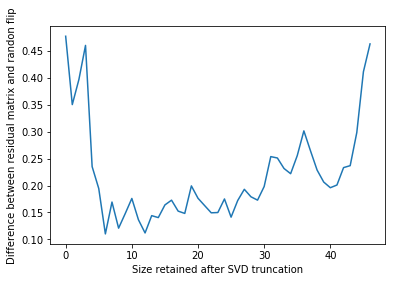

In [25]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART
diff = np.zeros(47)
for k_random in range(47):
    #k_random = 1
    Xk = svdcomp(X, components=range(k_random+1))
    X_k = X - Xk
    X_k_2 = np.linalg.norm(X_k, ord=2)
    X_k_cap = np.multiply(X_k, np.random.choice([-1,1], X.shape))
    X_k_2_cap = np.linalg.norm(X_k_cap, ord=2)

    diff[k_random] = (X_k_2 - X_k_2_cap) / np.linalg.norm(X_k, ord='fro')

print(diff)
plt.plot(diff)
plt.xlabel('Size retained after SVD truncation')
plt.ylabel('Difference between residual matrix and randon flip')
plt.savefig('2eiii')

In [26]:
# 2e What, if any, of these would be your choice?
# YOUR PART

## 2f

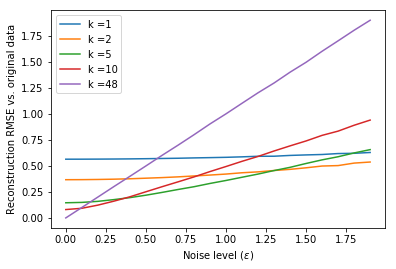

In [27]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART

for k in [1,2,5,10,48]:
    i=0
    rmse = np.zeros(len(np.arange(0,2,0.1)))
    for epsilon in np.arange(0,2,0.1):
        X_noise = X + np.random.randn(*X.shape) * epsilon
        X_noise_recon = svdcomp(X_noise, components = range(k))
        rmse[i] = (1/np.sqrt(m*n)) * np.linalg.norm(X - X_noise_recon)
        i=i+1
    if i==0:
        nextplot()
    plt.plot(np.arange(0,2,0.1), rmse, label = 'k ={}'.format(k))

plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")
plt.legend()
plt.savefig('2f')

# 3 SVD and k-means

In [28]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

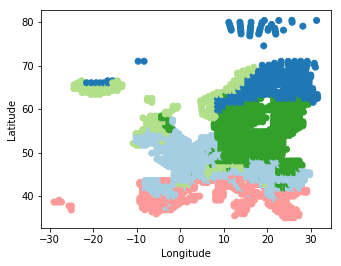

In [30]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('3a')

## 3b

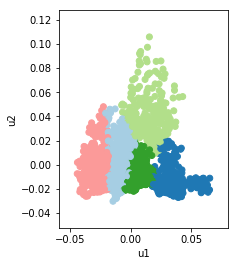

In [31]:
# YOUR PART HERE
plot_xy(U[:, 0], U[:, 1], X_clusters)
plt.xlabel("u1")
plt.ylabel("u2")
plt.savefig('3b')

## 3c

In [32]:
# Compute the PCA scores, store in Z (of shape N x k)
k2 = 2
# YOUR PART HERE
U, S, Vt = compute_svd(X)
Z = svdcomp(X, components=range(k2))
Z.shape
Z = Z @ np.transpose(Vt[:k2, :])
#Z = np.dot(Z,np.transpose(Vt[1,:]))
print(Z)

[[-8.66502823  4.55581225]
 [-8.21979448  4.51199781]
 [-8.91586657  4.72061625]
 ...
 [ 8.2594551  -1.48025141]
 [ 9.13349919 -1.84214326]
 [ 8.42073364 -0.80435535]]


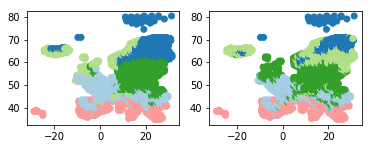

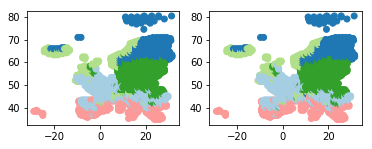

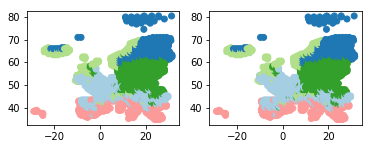

In [33]:
# cluster and visualize
for k in [1,2,3]:
    U, S, Vt = compute_svd(X)
    X_comp = svdcomp(X, components=range(k))
    Z = X_comp @ np.transpose(Vt[:k, :])
    Z_clusters = KMeans(5).fit(Z).labels_
    # match clusters as well as possible (try without)
    Z_clusters = match_categories(X_clusters, Z_clusters)
    nextplot()
    axs = plt.gcf().subplots(1, 2)
    plot_xy(lon, lat, X_clusters, axis=axs[0])
    plot_xy(lon, lat, Z_clusters, axis=axs[1])
    plt.savefig('3c{}'.format(k))